<a href="https://colab.research.google.com/github/PANKAJ-GUPTA-201998/Time-Series-Forcasting-By-ARIMA-Holt-Winters-/blob/main/15%25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
#!pip install pmdarima

In [202]:
# Import Libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [203]:
# Import data from and in DataFram
do = pd.read_csv('/content/ACTUAL_DATASET (1).csv')
data =do.iloc[:1440]
del data['MEMORY']
data.columns = ['Time','Request']
data['Time'] = pd.to_datetime(data['Time'], format='%d.%m.%Y %H:%M:%S')
Time = data.pop('Time')
data.head()

,Request
0,307
1,223
2,134
3,116
4,134


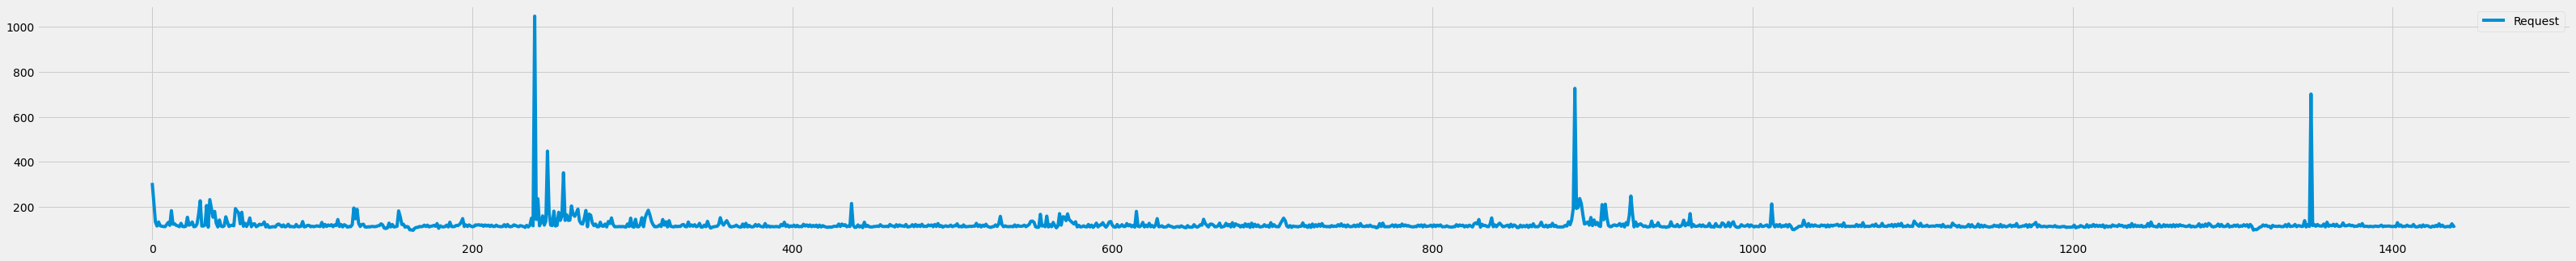

In [204]:
data.plot(figsize=(50,5))

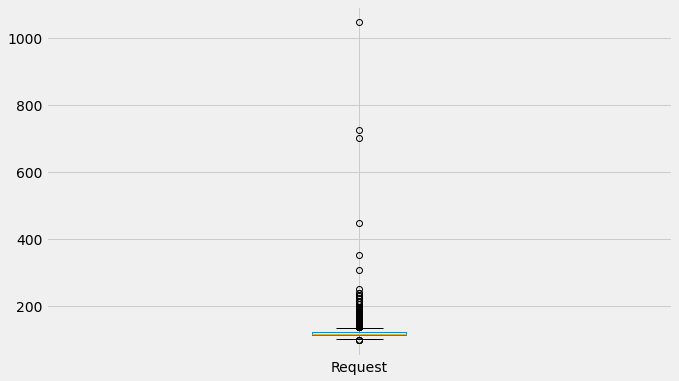

In [205]:
data.boxplot()

In [206]:
data.mean()

Request    122.578472
dtype: float64

In [207]:
#ADF to chek the series Stationarity
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data)

print('ADF Statistic: %f' % adf_test[0])
print('No of Lags: %f' % adf_test[2])
print('No of Observations: %f' % adf_test[3])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -5.922159
No of Lags: 17.000000
No of Observations: 1422.000000
Critical Values @ 0.05: -2.86
p-value: 0.000000


<Figure size 720x432 with 0 Axes>

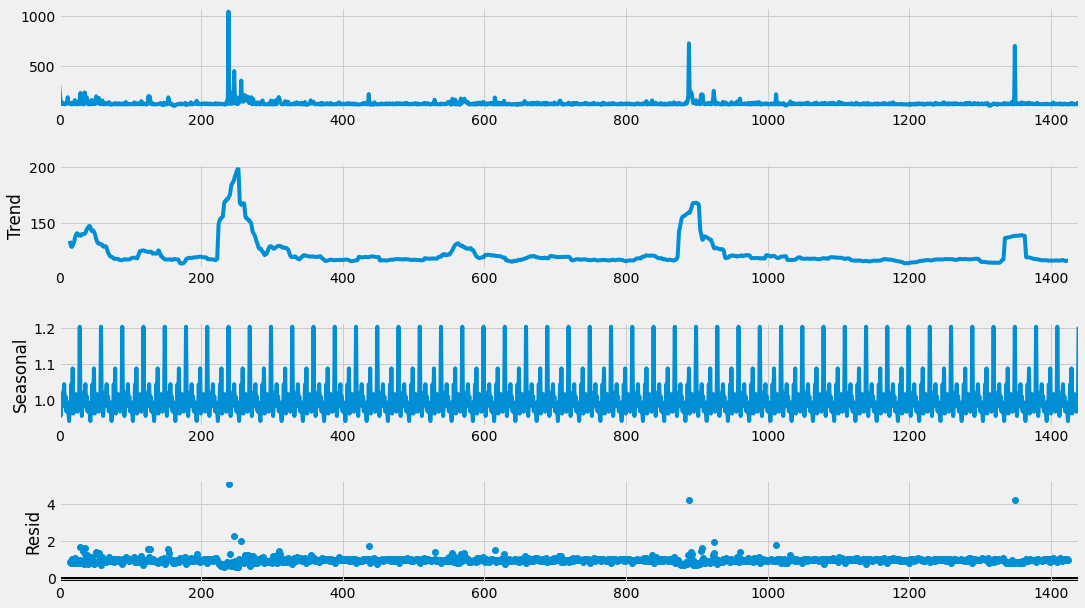

In [208]:
result = seasonal_decompose(data, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


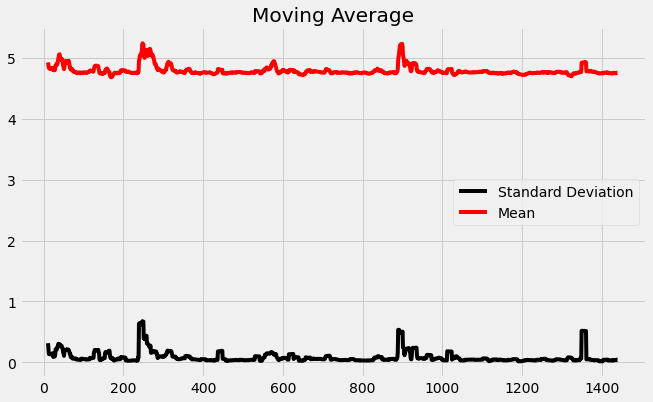

In [209]:
# Convert data on Log to reduce the magnitude of the values and reduce the rising trend in the series 
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(data)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

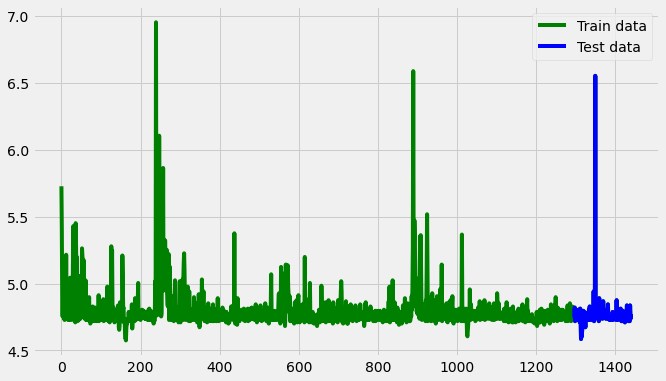

In [210]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [211]:
# Check the corrct values and model
model_autoARIMA1 = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7725.420, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6072.406, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1541.635, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1554.898, Time=0.77 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-1589.717, Time=1.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-1574.980, Time=1.21 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-1606.720, Time=1.14 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1577.525, Time=0.87 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-1622.156, Time=1.54 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=-1550.744, Time=1.99 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-1541.126, Time=1.65 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : A

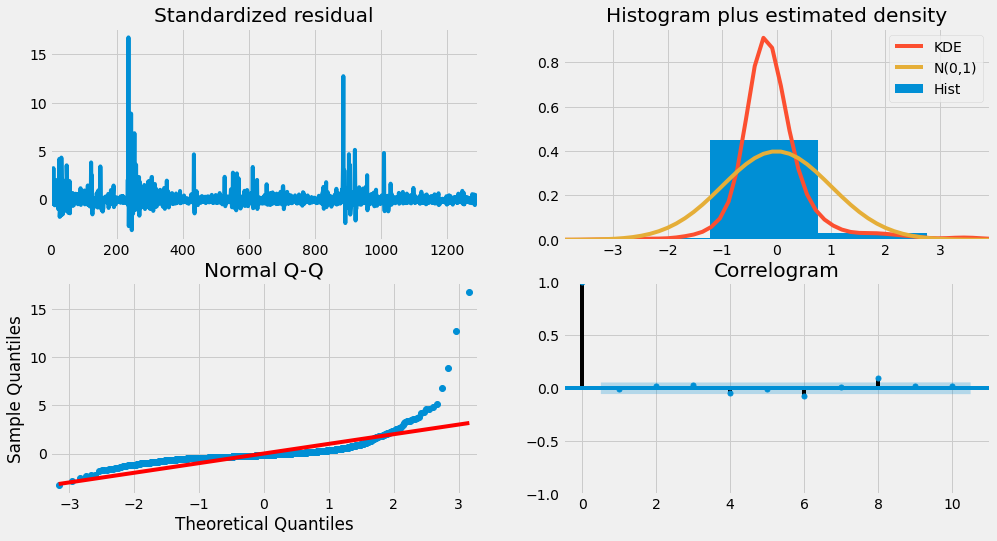

In [212]:
# Residual Data plot
model_autoARIMA1.plot_diagnostics(figsize=(15,8))
plt.show()

In [213]:
import statsmodels.api as sm

In [223]:
# Fit the data on ARMA modeal with parameter (3,3)
model = sm.tsa.arima.ARIMA(train_data, order=(3, 0, 2))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                Request   No. Observations:                 1293
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 825.853
Date:                Thu, 21 Apr 2022   AIC                          -1637.707
Time:                        19:06:20   BIC                          -1601.553
Sample:                             0   HQIC                         -1624.138
                               - 1293                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7919      0.023    212.073      0.000       4.748       4.836
ar.L1          0.0774      0.031      2.515      0.012       0.017       0.138
ar.L2          0.9338      0.014     65.853      0.0

In [224]:
# ljungbox test
import statsmodels.api as sm
sm.stats.acorr_ljungbox(fitted.resid, lags=[20], return_df=True)

,lb_stat,lb_pvalue
20,70.638935,1.431963e-07


1296    4.744459
1297    4.785910
1298    4.754422
1299    4.789612
1300    4.757507
          ...   
1565    4.795493
1566    4.788311
1567    4.795451
1568    4.788352
1569    4.795410
Name: predicted_mean, Length: 274, dtype: float64


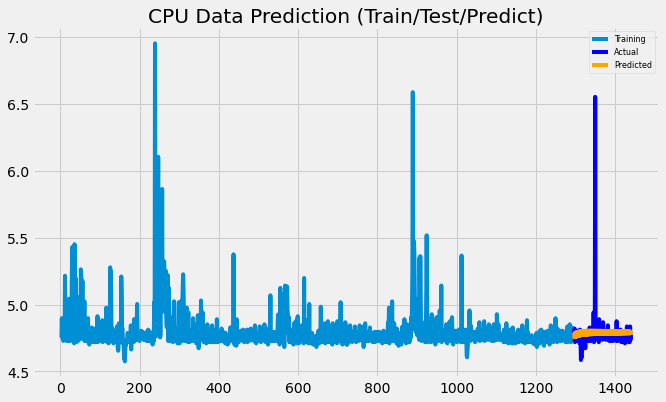

In [225]:
fc = fitted.forecast(274, alpha=0.05) 
print(fc) # 95% confidence
fc_series = pd.Series(fc, index=test_data.index, name="Request")
plt.plot(train_data, label='Training')
plt.plot(test_data, color = 'blue', label='Actual')
plt.plot(fc_series, color = 'orange',label='Predicted')
plt.title('CPU Data Prediction (Train/Test/Predict)')
plt.legend(loc='upper right', fontsize=8)
plt.show()

In [226]:
# report performance after train and test
p = fc_series.to_frame()
fc = fc[:144]
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(test_data['Request']- p['Request']/np.abs(test_data['Request'])))
print('MAPE: '+str(mape))
mpe = np.mean((test_data['Request']- p['Request']/np.abs(test_data['Request'])*100))
print('MPE: '+str(mpe))
me = np.mean(test_data['Request']- p['Request'])
print('ME: '+str(me))

MSE: 0.024062960768610496
MAE: 0.05424633063280779
RMSE: 0.1551224057594856
MAPE: 3.7635422108907743
MPE: -95.74596173926909
ME: -0.02076359873956844


In [227]:
# Now final pridict for 7 another days and now used all data set to train the model
model_pr = sm.tsa.arima.ARIMA(df_log, order=(3,0,2))  
fitted_pr = model_pr.fit()  
print(fitted_pr.summary())

                               SARIMAX Results                                
Dep. Variable:                Request   No. Observations:                 1440
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 856.942
Date:                Thu, 21 Apr 2022   AIC                          -1699.884
Time:                        19:06:52   BIC                          -1662.978
Sample:                             0   HQIC                         -1686.107
                               - 1440                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7941      0.023    211.307      0.000       4.750       4.839
ar.L1          0.0779      0.030      2.622      0.009       0.020       0.136
ar.L2          0.9401      0.014     67.761      0.0

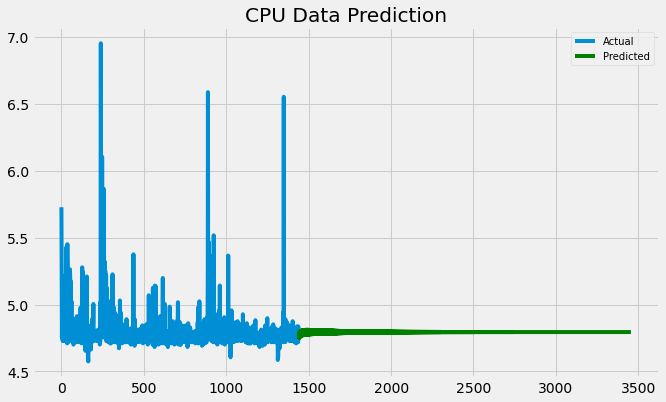

In [228]:
# Forecast for 7 another days so 1440 records required
x = pd.Series(range(test_data.index.max()+1,4752))
fc_pr = fitted_pr.forecast(2016, alpha=0.05)  # 95% confidence
fc_series_pr = pd.Series(fc_pr, index = x, name="Request")
plt.plot(df_log, label='Actual')
plt.plot(fc_series_pr, color = 'green',label='Predicted')
plt.title('CPU Data Prediction')
plt.legend(loc='upper right', fontsize=10)
plt.show()

In [229]:
# Creating final pridict data set and recover the original series
pridict_data_CPU = np.round((np.exp(fc_series_pr)),0)
pridict_data_CPU.head()

1440    115.0
1441    120.0
1442    116.0
1443    121.0
1444    116.0
Name: Request, dtype: float64

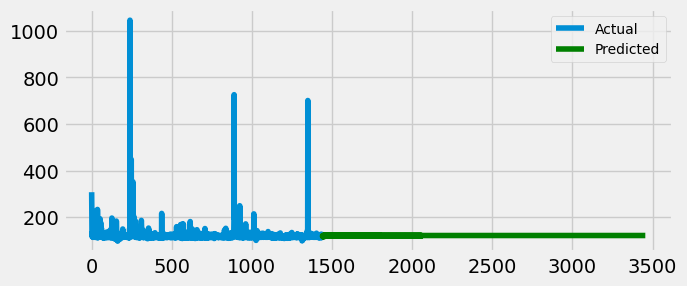

In [230]:
# Plot the actualy (Recovered) series with actual
plt.figure(figsize=(7,3), dpi=100)
plt.plot(data, label='Actual')
plt.plot(pridict_data_CPU, color = 'green',label='Predicted')
plt.legend(loc='upper right', fontsize=10)
plt.show()

In [222]:
# Export data in 'pridict_data_CPU.csv' 
pridict_data_CPU.to_csv(r'pridict_data_CPU.csv', index = False)